# NYC Crime and Events Analysis (2022-2024)

Comprehensive analysis of NYC arrests and events data for crime patterns and correlations.

In [17]:
# Import libraries
from sodapy import Socrata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [18]:
# Initialize API client
client = Socrata("data.cityofnewyork.us", None, timeout=120)

# Target crime types
target_offenses = [
    "ROBBERY", 
    "ASSAULT 3 & RELATED OFFENSES", 
    # "OFFENSES AGAINST PUBLIC SAFETY",
    # "KIDNAPPING & RELATED OFFENSES", 
    # "THEFT-FRAUD"x
    "PETIT LARCENY",
    "DANGEROUS DRUGS",
    "CRIMINAL TRESPASS",
]

print("🎯 Target Crime Types:")
for i, offense in enumerate(target_offenses, 1):
    print(f"   {i}. {offense}")

🎯 Target Crime Types:
   1. ROBBERY
   2. ASSAULT 3 & RELATED OFFENSES
   3. PETIT LARCENY
   4. DANGEROUS DRUGS
   5. CRIMINAL TRESPASS


In [19]:
# Load Arrests Data for 2022-2024
print("📥 Loading Arrests Data (2022-2024)...")

# Use the correct dataset ID for arrests
arrests_results = client.get(
    "8h9b-rp9u",  # NYC Arrests dataset
    where="arrest_date >= '2024-01-01T00:00:00.000' AND arrest_date < '2025-01-01T00:00:00.000'",
    limit=500000
)



📥 Loading Arrests Data (2022-2024)...


In [20]:
df_arrests = pd.DataFrame.from_records(arrests_results)
print(f"✅ Loaded {len(df_arrests):,} arrest records")

# Process dates
df_arrests["arrest_date"] = pd.to_datetime(df_arrests["arrest_date"])

# Filter for target offenses
df_arrests_filtered = df_arrests[df_arrests["ofns_desc"].isin(target_offenses)].copy()
print(f"✅ Filtered to {len(df_arrests_filtered):,} records for target crimes")

# Show date range and year distribution
print(f"📅 Date Range: {df_arrests_filtered['arrest_date'].min()} to {df_arrests_filtered['arrest_date'].max()}")
print(f"📊 Year Distribution:")
year_counts = df_arrests_filtered['arrest_date'].dt.year.value_counts().sort_index()
for year, count in year_counts.items():
    print(f"   • {year}: {count:,} arrests")

✅ Loaded 260,503 arrest records
✅ Filtered to 98,653 records for target crimes
📅 Date Range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00
📊 Year Distribution:
   • 2024: 98,653 arrests
✅ Filtered to 98,653 records for target crimes
📅 Date Range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00
📊 Year Distribution:
   • 2024: 98,653 arrests


In [21]:
df_arrests["ofns_desc"].unique() 

array(['OFFENSES INVOLVING FRAUD', 'FELONY ASSAULT',
       'ASSAULT 3 & RELATED OFFENSES', "BURGLAR'S TOOLS",
       'VEHICLE AND TRAFFIC LAWS', 'SEX CRIMES', 'BURGLARY',
       'PETIT LARCENY', 'ALCOHOLIC BEVERAGE CONTROL LAW',
       'OFF. AGNST PUB ORD SENSBLTY &', 'ROBBERY', 'DANGEROUS WEAPONS',
       'INTOXICATED & IMPAIRED DRIVING', 'CRIMINAL MISCHIEF & RELATED OF',
       'POSSESSION OF STOLEN PROPERTY', 'FOR OTHER AUTHORITIES',
       'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE',
       'MISCELLANEOUS PENAL LAW', 'MURDER & NON-NEGL. MANSLAUGHTE',
       'OFFENSES RELATED TO CHILDREN', 'DANGEROUS DRUGS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'OTHER OFFENSES RELATED TO THEFT', 'FORGERY', 'HARRASSMENT 2',
       'OFFENSES AGAINST PUBLIC SAFETY', 'INTOXICATED/IMPAIRED DRIVING',
       'CRIMINAL TRESPASS', 'GAMBLING', 'RAPE', 'OTHER STATE LAWS',
       'OTHER STATE LAWS (NON PENAL LAW)',
       'KIDNAPPING & RELATED OFFENSES', 'OTHER T

In [22]:
# Load Events Data for 2022-2024
print("📥 Loading Events Data (2022-2024)...")

# Use the correct dataset ID for events
events_results = client.get(
    "bkfu-528j",  # NYC Events dataset
    where="start_date_time >= '2024-01-01T00:00:00.000' AND start_date_time < '2025-01-01T00:00:00.000'",
    limit=10000000
)



📥 Loading Events Data (2022-2024)...


In [23]:
df_events = pd.DataFrame.from_records(events_results)
print(f"✅ Loaded {len(df_events):,} event records")

# Process dates
if "start_date_time" in df_events.columns:
    df_events["start_date_time"] = pd.to_datetime(df_events["start_date_time"], errors="coerce")
    
    # Show date range and year distribution
    print(f"📅 Date Range: {df_events['start_date_time'].min()} to {df_events['start_date_time'].max()}")
    print(f"📊 Year Distribution:")
    event_year_counts = df_events['start_date_time'].dt.year.value_counts().sort_index()
    for year, count in event_year_counts.items():
        print(f"   • {year}: {count:,} events")

if "end_date_time" in df_events.columns:
    df_events["end_date_time"] = pd.to_datetime(df_events["end_date_time"], errors="coerce")

print(f"\n🎯 Final Datasets:")
print(f"   • Arrests (Target Crimes): {len(df_arrests_filtered):,} records")
print(f"   • Events (All Types): {len(df_events):,} records")

✅ Loaded 4,283,316 event records
📅 Date Range: 2024-01-01 00:00:00 to 2024-12-31 22:00:00
📊 Year Distribution:
   • 2024: 4,283,316 events
📅 Date Range: 2024-01-01 00:00:00 to 2024-12-31 22:00:00
📊 Year Distribution:
   • 2024: 4,283,316 events

🎯 Final Datasets:
   • Arrests (Target Crimes): 98,653 records
   • Events (All Types): 4,283,316 records

🎯 Final Datasets:
   • Arrests (Target Crimes): 98,653 records
   • Events (All Types): 4,283,316 records


In [24]:
df_events

,event_id,event_name,start_date_time,end_date_time,event_agency,event_type,event_borough,event_location,street_closure_type,community_board,police_precinct,event_street_side
0,746721,New Years Eve Fireworks Display,2024-01-01 00:00:00,2024-01-01 00:10:00,Parks Department,Special Event,Brooklyn,Prospect Park: Long Meadow North,N/A,"55,","78,",NaN
1,739793,Lawn closure - Cherry Hill,2024-01-01 00:00:00,2024-01-01 01:00:00,Parks Department,Special Event,Manhattan,"Central Park: Cherry Hill ,Central Park: Wagne...",N/A,"64,","22,",NaN
2,739847,Lawn Closure - Mineral Springs,2024-01-01 00:00:00,2024-01-01 23:59:00,Parks Department,Special Event,Manhattan,Central Park: Mineral Springs,N/A,"64,","22,",NaN
3,679798,Landscape closed for season,2024-01-01 00:00:00,2024-01-01 23:00:00,Parks Department,Special Event,Manhattan,Central Park: Dana Discovery Center Lawn,N/A,"64,","22,",NaN
4,743992,Big Apple Circus,2024-01-01 00:00:00,2024-01-01 23:59:00,Parks Department,Special Event,Manhattan,"Damrosch Park: Bandshell ,Damrosch Park: Tent ...",N/A,"7,","20,",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4283311,814462,Football - Youth,2024-12-31 20:00:00,2024-12-31 23:00:00,Parks Department,Sport - Youth,Brooklyn,Leif Ericson Park: Dust Bowl - Soccer/Football-01,N/A,"10,","68,",NaN
4283312,811441,Soccer - Non Regulation,2024-12-31 22:00:00,2024-12-31 23:00:00,Parks Department,Sport - Adult,Brooklyn,McCarren Park: Soccer-01,N/A,"01,","94,",NaN
4283313,811441,Soccer - Non Regulation,2024-12-31 22:00:00,2024-12-31 23:00:00,Parks Department,Sport - Adult,Brooklyn,McCarren Park: Soccer-01,N/A,"01,","94,",NaN
4283314,811441,Soccer - Non Regulation,2024-12-31 22:00:00,2024-12-31 23:00:00,Parks Department,Sport - Adult,Brooklyn,McCarren Park: Soccer-01,N/A,"01,","94,",NaN


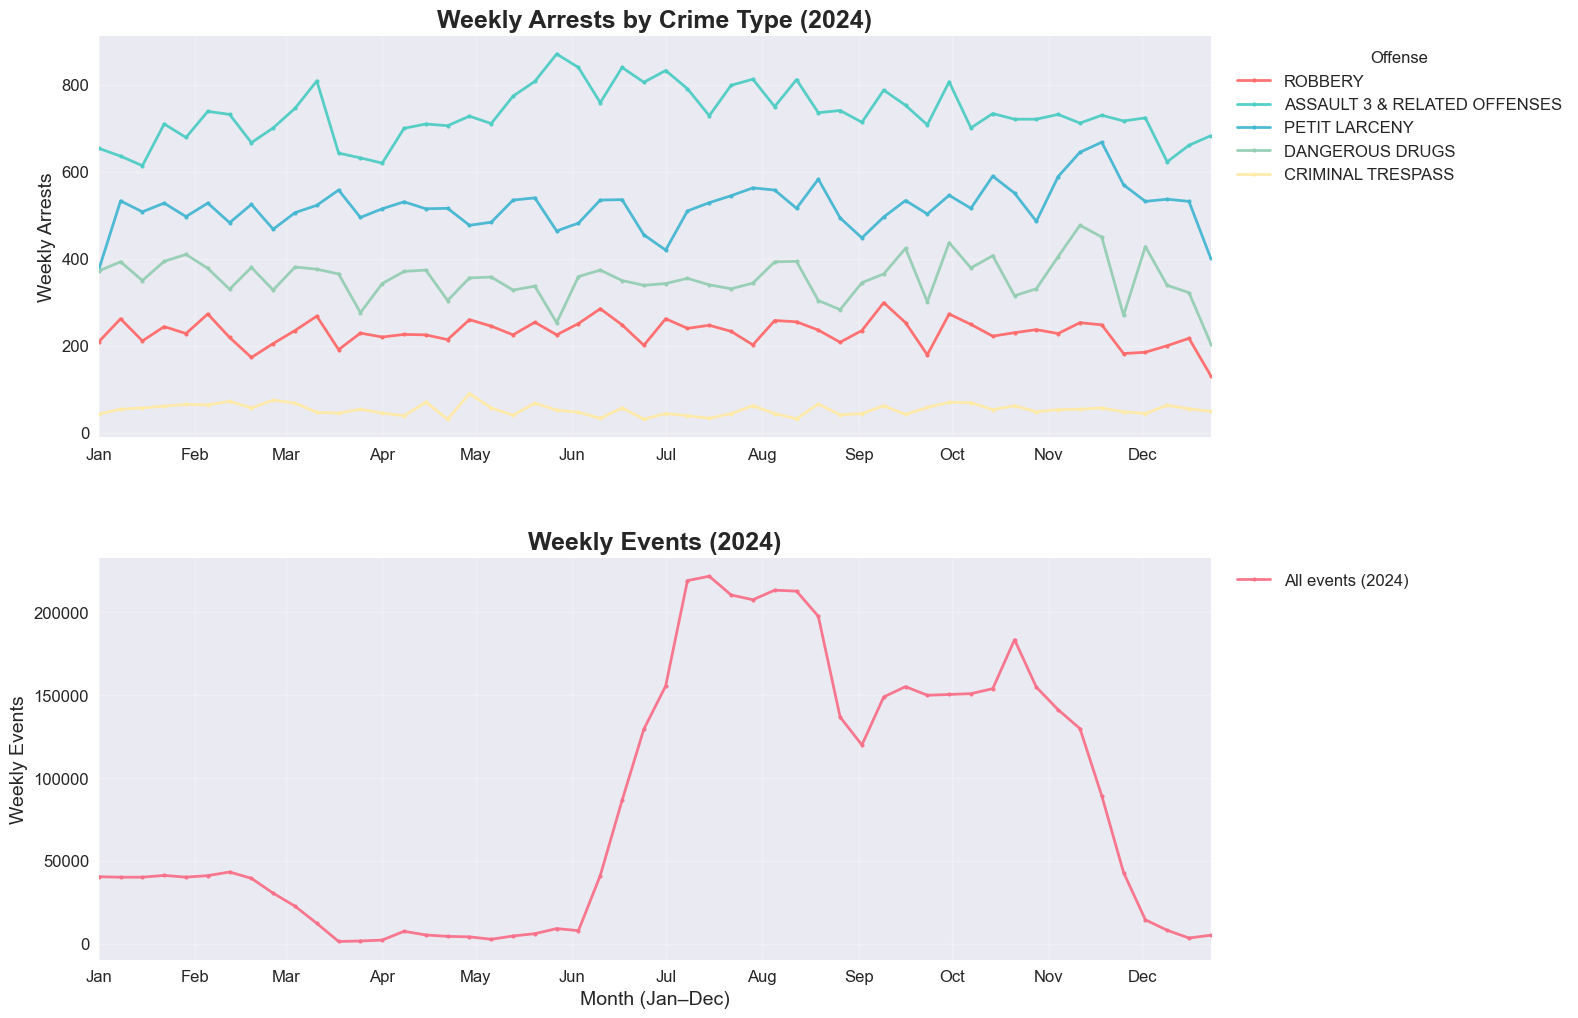

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ----------------- Fonts & Layout -----------------
TITLE_FS = 18
LABEL_FS = 14
TICK_FS  = 12
LEGEND_FS = 12
LEGEND_TITLE_FS = 12

# ---------- Gemeinsame Vorbereitungen ----------
# Arrests
df_a = df_arrests_filtered.copy()
df_a['arrest_date'] = pd.to_datetime(df_a['arrest_date'], errors='coerce')
iso_a = df_a['arrest_date'].dt.isocalendar()
df_a['iso_year'] = iso_a.year
df_a['iso_week'] = iso_a.week
df_a = df_a[(df_a['iso_year'] == 2024) & (df_a['iso_week'] <= 52)]

# Events
ev = df_events.copy()
ev['start_date_time'] = pd.to_datetime(ev['start_date_time'], errors='coerce')
ev = ev.dropna(subset=['start_date_time'])
iso_e = ev['start_date_time'].dt.isocalendar()
ev['iso_year'] = iso_e.year
ev['iso_week'] = iso_e.week
ev = ev[(ev['iso_year'] == 2024) & (ev['iso_week'] <= 52)]

# X-Achse: identische Referenzdaten (Montag jeder ISO-KW in Dummy-Jahr 2024)
week_dates = [pd.Timestamp.fromisocalendar(2024, w, 1) for w in range(1, 53)]

# ---------- Figure & Axes ----------
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 12), constrained_layout=False)
# Platz rechts für beide Legenden reservieren, damit gleiche Plotbreite
fig.subplots_adjust(right=0.82, hspace=0.30)

# ---------- Plot 1: Arrests ----------
for i, offense in enumerate(target_offenses):
    sub = df_a[df_a['ofns_desc'] == offense]
    if sub.empty:
        continue
    weekly_counts = (
        sub.groupby('iso_week')
           .size()
           .reindex(range(1, 53), fill_value=0)
    )
    ax1.plot(
        week_dates, weekly_counts.values,
        label=offense,
        color=crime_colors[i % len(crime_colors)],
        linewidth=2, marker='o', markersize=3, alpha=0.95
    )

ax1.set_title('Weekly Arrests by Crime Type (2024)', fontsize=TITLE_FS, fontweight='bold')
ax1.set_ylabel('Weekly Arrests', fontsize=LABEL_FS)
ax1.legend(title='Offense', frameon=False, loc='upper left', bbox_to_anchor=(1.01, 1.0),
           fontsize=LEGEND_FS, title_fontsize=LEGEND_TITLE_FS)

# ---------- Plot 2: Events ----------
weekly_counts_e = (
    ev.groupby('iso_week')
      .size()
      .reindex(range(1, 53), fill_value=0)
)
ax2.plot(
    week_dates, weekly_counts_e.values,
    linewidth=2, marker='o', markersize=3, alpha=0.95,
    label='All events (2024)'
)

ax2.set_title('Weekly Events (2024)', fontsize=TITLE_FS, fontweight='bold')
ax2.set_xlabel('Month (Jan–Dec)', fontsize=LABEL_FS)
ax2.set_ylabel('Weekly Events', fontsize=LABEL_FS)
ax2.legend(frameon=False, loc='upper left', bbox_to_anchor=(1.01, 1.0),
           fontsize=LEGEND_FS, title_fontsize=LEGEND_TITLE_FS)

# ---------- Gemeinsame X-Achse & Styling ----------
for ax in (ax1, ax2):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.grid(True, alpha=0.25)
    ax.tick_params(axis='both', labelsize=TICK_FS)

# WICHTIG: Bei sharex zeigt Matplotlib standardmäßig nur unten die x-Ticks an.
# Damit auch der obere Plot Monatslabels hat:
ax1.tick_params(axis='x', labelbottom=True)

ax2.set_xlim(week_dates[0], week_dates[-1])

plt.show()
